# Adaptive Intelligence COM3240

## Lab 8: Reinforcement Learning - Future Rewards

### Learning Outcomes
- Understand how reinforcement learning works.
- Ability to develop a simple reinforcement learning scenario.

## Lecture overview

### Future rewards

It is possible for the agent to be rewarded not only when he reached the goal (future reward) but also by performing correct actions towards the goal (immediate reward).

There should be a difference between the  and , since future reward cannot be as good as present reward: $Q(s,a)$ and $Q(s', as')$ since future reward cannot be as good as the present reward:

\begin{align}
\Delta Q (s,a) &= \eta\left[r- \left(Q(s,a) - Q(s', a') \right)\right] \Rightarrow \\
\Delta Q (s,a) &= \eta\left[r- \left(Q(s,a) - \gamma Q(s', a') \right)\right] 
\end{align}

where $\gamma$ is a discount factor

The SARSA algorithm

<img src="http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture8/icons/sarsa_algorithm.png" width="500"/>


## Laboratory 8: Future rewards

#### Exercise
An agent is presented with two buttons, Green and Red. Reward will be given if it presses first the Red button and then the Green button.
1. In a simple diagram show the states for this paradigm.
2. Can we use simple update rule (used in the previous Lab) to solve this task? Justify your response. Explain your arguments without resorting to simulations.
3. Modify your earlier code of an ANN (developed in the previous Lab) using the SARSA algorithm to model this scenario. Suggested input vectors to represent the three states: [1 0 0]', [0 1 0]', [0 0 1]', but you are free to study alternative (better) implementations. Plot the learning curve.
4. In order to draw conclusions we need to repeat this procedure many times and show an average learning curve. Repeat the above procedure 10 times and plot the average graph with errorbars (Matlab commands mean and errorbar).
5. Would the use of an epsilon-greedy policy make any difference in this case? Modify your code accordingly and explain your results.
6. The rules of the game change. Initial Q values are set to zero. In case of a wrong response, a small reward of 0.1 is administered. In case of a correct response, a reward of 10 with probability 1/10 is given (i.e. in 1 out of 10 cases). Change your code accordingly. Would you be able to achieve maximum reward with the parameters you have used earlier? If not, could you and appropriate parameters to achieve learning? Would the use of an epsilon-greedy policy make any difference in this case?
7. What are the main parameters of the model and how do they affect performance? Justify your response.

#### Function that returns the rewards for each trial

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def sarsa_monkey_nn(nTrials,learningRate,epsilon,gamma):

    # States and Actions
    neutral = 0
    pressedRed = 1
    pressedGreen = 2

    Red = 0
    Green = 1

    nStates = 3
    nActions = 2

    choices = 2 # number of steps within each trial

    # Define input as unit vectors to present to the network --> neutral=(1,0,0), pressedRed=(0,1,0), pressedGreen=(0,0,1)
    state = np.eye(nStates) #A scalar matrix

    # Weights matrix, connecting input neurons (state) to output neurons (actions). Initially random
    weights = np.random.rand(nActions,nStates)

    # Define reward vector (one position for each trial) and initialise it to zero
    Rewards = np.zeros((1,nTrials))

    # Start the episode
    for trial in range(nTrials):

        # Each episode starts at neutral --> non of the buttons is pressed
        stateIndex = neutral

        # Define and initialise at every trial the variables needed for sarsa algorithm
        inputOld = np.zeros((nStates,1))
        outputOld = np.zeros((nActions,1))
        QvalueOld = 0
        rOld = 0

        # simulate the two step trial
        for step in range(choices):

            # Convert the initial state into a vector
            input_vector = state[:,stateIndex].reshape((3,1))

            # Compute Qvalues.  Qvalue = logsig(weights*input). Qvalue is 2x1, one value for each output neuron
            Qvalue = 1 / (1 + np.exp(- weights.dot(input_vector)))

            # Epsilon-greedy parameter
            eGreedy = int(np.random.rand() < epsilon) # with probability epsilon choose action at random; if epsilon = 0 then always choose Greedy

            # Implement the policy
            if Qvalue[Red] == Qvalue[Green] or eGreedy:
                Action = np.random.randint(2) # if Qvalues are the same or epsilon>0 (e-Greedy, choose at random with probability epsilon) choose one at random
            else:
                Action = int(Qvalue[Green] > Qvalue[Red]) # otherwise choose greedy. Will result Action=1 (Green) if Qvalue(Image,Green)>Qvalue(Imgage,Red)

            # Collect Reward
            if stateIndex == pressedRed and Action == Green:
                r = 1
            else:
                r = 0

            # Rectified output - a binary array with a single non-zero element corresponding to the selected action. This is in order to update the weights only to the neuron whose action was selected
            output = np.zeros((2,1))
            output[Action,0] = 1

            # Move State
            stateIndex += Action

            # Update weights
            dw = learningRate * (rOld - QvalueOld + gamma * Qvalue[Action]) * outputOld.dot(inputOld.T)
            weights += dw

            # Update variables for sarsa
            QvalueOld = Qvalue[Action]
            outputOld = output
            inputOld = input_vector
            rOld = r

        # Update weights for the terminal state
        dw = learningRate * (rOld - QvalueOld) * outputOld.dot(inputOld.T)
        weights += dw

        # Store reward for the current trial
        Rewards[0,trial] = rOld

    return Rewards

#### Script that calls the function sarsa_monkey_nn

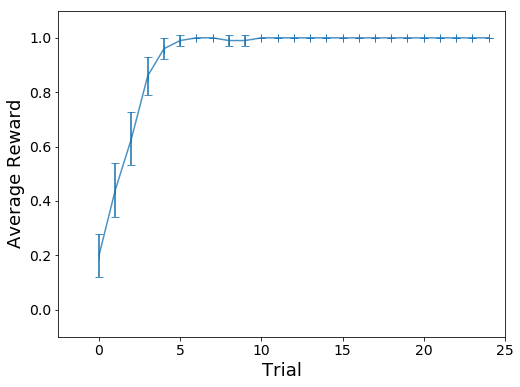

In [33]:


#Parameter setup
nTrials = 25#20        # should be integer >0
learningRate = 0.5 #0.8  # should be real, Greater than 0
epsilon = 0.001     # should be real, Greater or Equal to 0; epsilon=0 Greedy, otherwise epsilon-Greedy

gamma = 0.9         # should be real, positive, smaller than 1

repetitions = 100   # number of episodes, should be integer, greater than 0; for statistical reasons

totalRewards = np.zeros((repetitions,nTrials))  # reward matrix. each row contains rewards obtained in one episode

fontSize = 18

# Start iterations over episodes
for j in range(repetitions):
    totalRewards[j,:] = sarsa_monkey_nn(nTrials,learningRate,epsilon,gamma)

plt.figure(figsize = (8, 6))
means = np.mean(totalRewards, axis = 0)
errors = 2 * np.std(totalRewards, axis = 0)/np.sqrt(repetitions)
plt.errorbar(np.arange(nTrials), means, errors, 0, elinewidth = 2, capsize = 4, alpha =0.8)
plt.xlabel('Trial',fontsize = fontSize)
plt.ylabel('Average Reward',fontsize = fontSize)
plt.axis((-(nTrials/10.0),nTrials,-0.1,1.1))
plt.tick_params(axis = 'both', which='major', labelsize = 14)
plt.show()